Model Tuning / Model Optimization
1. Preprocessing Data: Mengatur dan mempersiapkan data agar model dapat bekerja dengan optimal
2. Hyperparameter Tuning: Mencari kombinasi parameter terbaik untuk model agar memberikan hasil yang lebih baik
3. Cross-validation: Melakukan evaluasi model di beberapa subset data untuk memastikan bahwa model tidak overfitting dan memiliki generalisasi yang baik.
4. Model Selection: Mencoba berbagai algoritma untuk melihat mana yang memberikan performa terbaik di dataset yang sama.
5. Ensemble Learning: Menggabungkan beberapa model untuk meningkatkan akurasi dan mengurangi bias atau variance.

Semua langkah tersebut dilakukan untuk meningkatkan akurasi atau performa model, baik dari segi presisi (seberapa benar prediksi model), recall (kemampuan model dalam menemukan semua kasus positif), dan metrik lainnya seperti F1-score atau AUC-ROC.

Percobaan 1: 73%

Missing value per kolom:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Jumlah data duplikat: 0
Fitting 5 folds for each of 48 candidates, totalling 240 fits

=== Hasil Evaluasi Model Random Forest ===
Akurasi: 0.7337662337662337

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



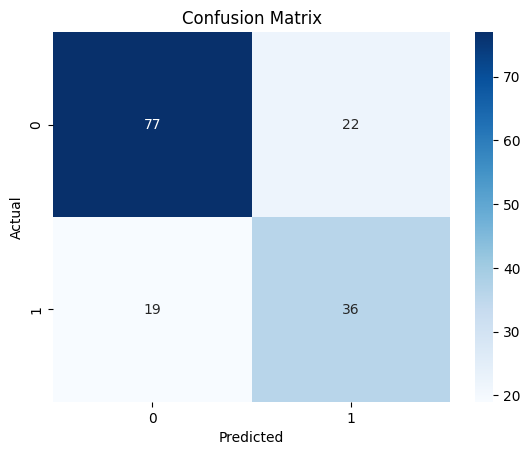

In [2]:
# === Import Library ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# === Load Data ===
df = pd.read_csv('diabetes.csv')  # Ganti dengan path dataset kamu

# === EDA & Preprocessing ===

# 1. Cek missing value dan duplikat
print("Missing value per kolom:")
print(df.isnull().sum())
print("\nJumlah data duplikat:", df.duplicated().sum())

# 2. Hapus duplikat (jika ada)
df.drop_duplicates(inplace=True)

# 3. Isi missing value (kalau ada)
df.fillna(df.mean(numeric_only=True), inplace=True)

# 4. Pisahkan fitur dan target
X = df.drop("Outcome", axis=1)  # Ganti 'target_column' dengan nama kolom target
y = df["Outcome"]

# 5. Normalisasi fitur (opsional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Random Forest Classifier ===
rf = RandomForestClassifier(random_state=42)

# === Hyperparameter Tuning (sederhana) ===
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# === Evaluasi Model ===
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Hasil Evaluasi Model Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Percobaan 2: 80%

Missing value per kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Jumlah data duplikat: 0
Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Hasil Evaluasi Model Random Forest ===
Akurasi: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78        99
           1       0.77      0.86      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



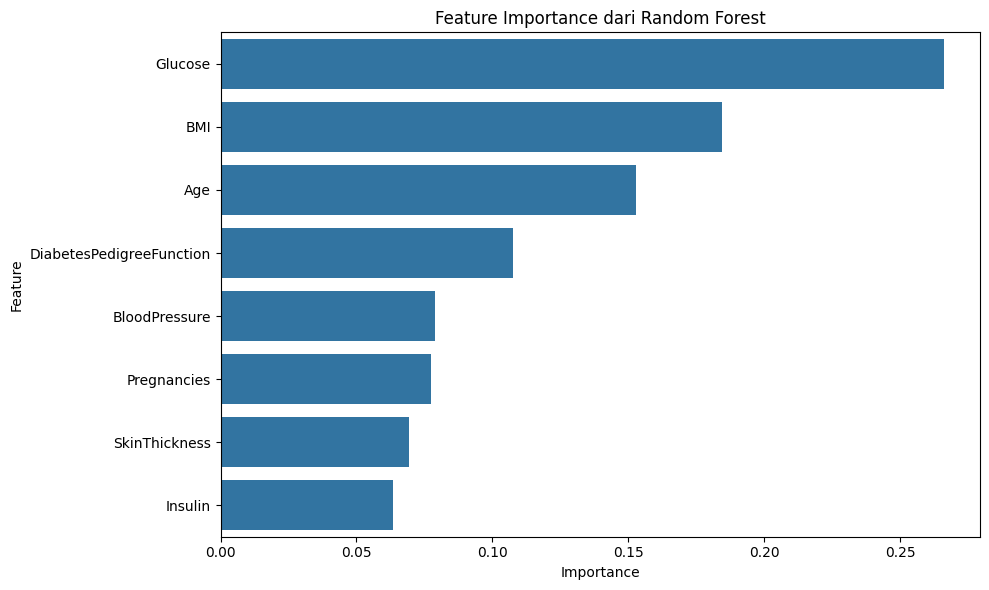

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")

# Cek missing value dan duplikat
print("Missing value per kolom:\n", df.isnull().sum())
print("Jumlah data duplikat:", df.duplicated().sum())

# Pisahkan fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE untuk oversampling data minoritas
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluasi model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Hasil Evaluasi Model Random Forest ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
feat_names = df.drop('Outcome', axis=1).columns
feature_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Percobaan 3: 85%

Missing value per kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Jumlah data duplikat: 0
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

=== Hasil Evaluasi Model Random Forest (Improved) ===
Akurasi: 0.859375

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       103
           1       0.81      0.91      0.86        89

    accuracy                           0.86       192
   macro avg       0.86      0.86      0.86       192
weighted avg       0.87      0.86      0.86       192



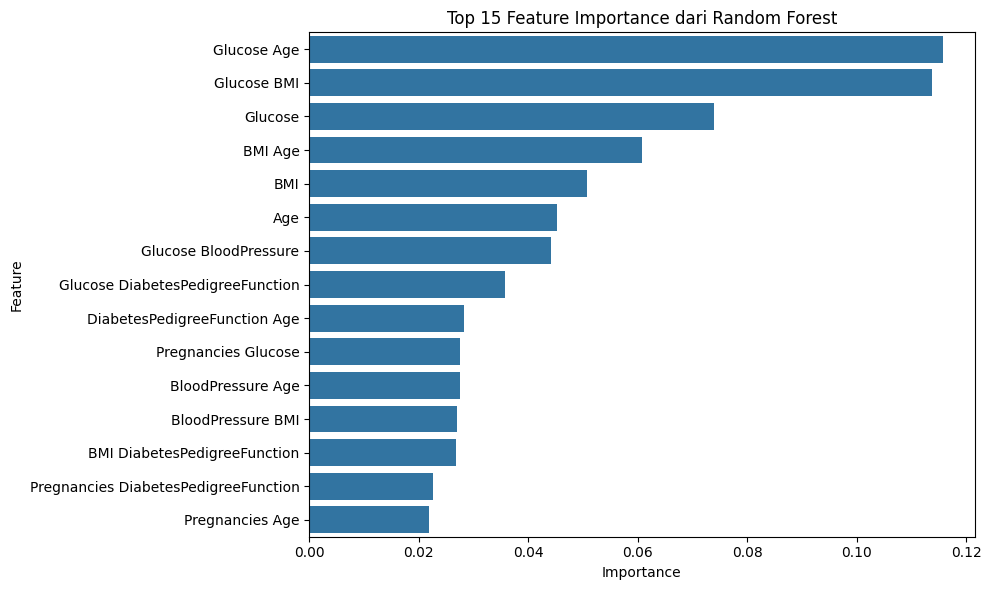

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")
print("Missing value per kolom:\n", df.isnull().sum())
print("Jumlah data duplikat:", df.duplicated().sum())

# Fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature Engineering (interaksi & polynomial)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# SMOTETomek
smote = SMOTETomek(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Parameter tuning
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluasi
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Hasil Evaluasi Model Random Forest (Improved) ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = best_rf.feature_importances_
feat_names = poly.get_feature_names_out(df.drop('Outcome', axis=1).columns)
feature_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values[:15], y=feature_importance.index[:15])
plt.title("Top 15 Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [13]:
print(feature_importance.head(15))

Glucose Age                         0.186573
Glucose BMI                         0.163280
Glucose                             0.113131
BMI Age                             0.111584
BMI                                 0.081545
Glucose DiabetesPedigreeFunction    0.073616
Glucose BloodPressure               0.071596
Age                                 0.067732
DiabetesPedigreeFunction Age        0.066527
BloodPressure BMI                   0.064416
dtype: float64


Percobaan 4: 86%

Missing value per kolom:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Jumlah data duplikat: 0
Fitting 5 folds for each of 72 candidates, totalling 360 fits

=== Hasil Evaluasi Model Random Forest (Tanpa PCA) ===
Akurasi: 0.8697916666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       103
           1       0.82      0.92      0.87        89

    accuracy                           0.87       192
   macro avg       0.87      0.87      0.87       192
weighted avg       0.88      0.87      0.87       192



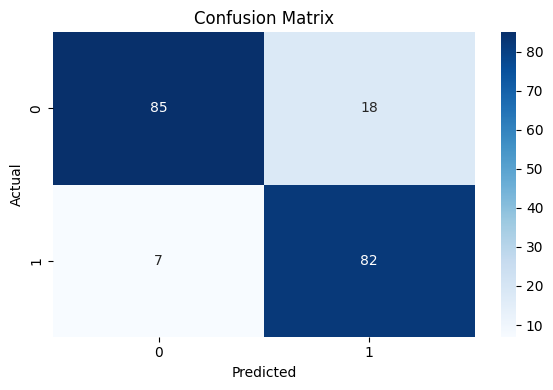

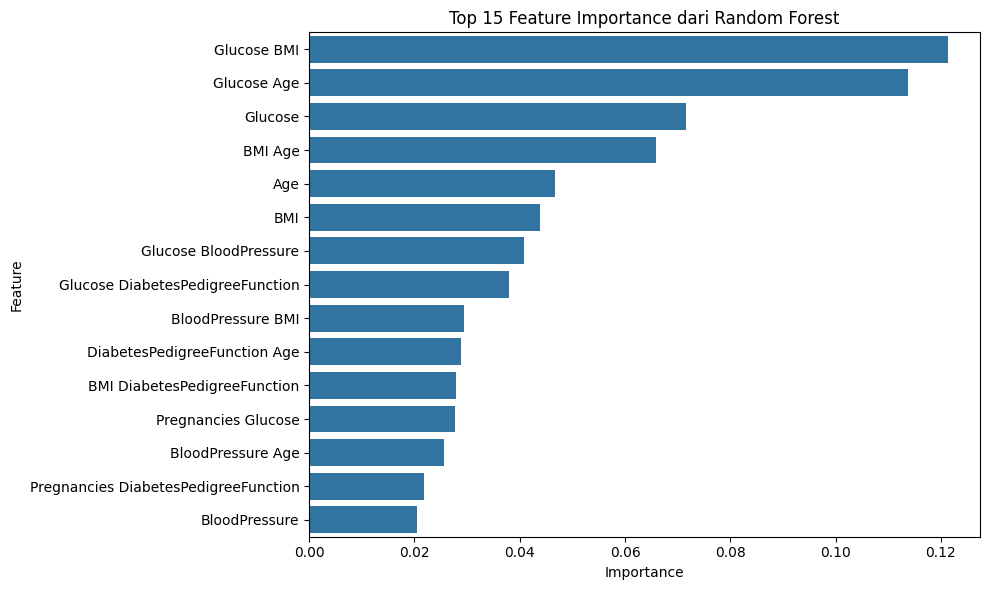

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")
print("Missing value per kolom:\n", df.isnull().sum())
print("Jumlah data duplikat:", df.duplicated().sum())

# Fitur dan label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature Engineering - Polynomial interaction only
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Penyeimbangan data
smote = SMOTETomek(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Evaluasi
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\n=== Hasil Evaluasi Model Random Forest (Tanpa PCA) ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Feature Importance (Top 15)
importances = best_rf.feature_importances_
feat_names = poly.get_feature_names_out(X.columns)
feature_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values[:15], y=feature_importance.index[:15])
plt.title("Top 15 Feature Importance dari Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()